In [3]:
import os
import gensim
from gensim import models
from gensim.models import Word2Vec, KeyedVectors
from gensim.models import Phrases

In [4]:
import psycopg2

con = psycopg2.connect(
  database="db_dsa", 
  user="udsa", 
  password="P@ssword2021", 
  host="92.242.58.173", 
  port="1984"
)

print("Database opened successfully")

Database opened successfully


/opt/anaconda3/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [7]:
import pandas as pd
cur = con.cursor()
cur.execute("SELECT * from PROJECTS")
rows = cur.fetchall()
column_names=["ID","NUMBER","VACANCIES","NAME","TYPE","TYPEDESC","TYPEID","STATUSID", "STATUSDESC","DIRECTIONHEAD","HEAD","DATACREATED","FACULTYID"]
df = pd.DataFrame(rows, columns=column_names)
df.head()

,ID,NUMBER,VACANCIES,NAME,TYPE,TYPEDESC,TYPEID,STATUSID,STATUSDESC,DIRECTIONHEAD,HEAD,DATACREATED,FACULTYID
0,205,NaN,2,Численное и аналитическое исследование эффекта...,nir,НИР,1,1,Готов к работе,Данилов Владимир Григорьевич,Данилов Владимир Григорьевич,08.05.2020 21:25:02,None
1,208,NaN,3,"Исследование механизмов образования, способов ...",nir,НИР,1,1,Готов к работе,,Грачев Николай,11.05.2020 14:07:40,None
2,215,NaN,1,Разработка моста переменного тока,soft-hard,Прогр-аппарат.,3,1,Готов к работе,,Балакин Станислав,13.05.2020 16:41:39,None
3,216,NaN,3,Разработка нательных антенн и излучателей для ...,soft-hard,Прогр-аппарат.,3,1,Готов к работе,Елизаров Андрей Альбертович,Скуридин Андрей,13.05.2020 17:00:19,None
4,218,NaN,0,Разработка глоссария физических терминов для м...,soft,Прогр.,2,1,Готов к работе,,Гузенкова Александра Сергеевна,13.05.2020 19:38:43,None


In [115]:
#подготовили данные
df1 = df[['NAME']]
df2 = df1.apply(lambda x: ';'.join(x.astype(str)), axis=1)
df_clean = pd.DataFrame({'clean': df2})
sent = [row.split(';') for row in df_clean['clean']]
sent[0]

['Численное и аналитическое исследование эффекта Саффмана-Тейлора']

In [116]:
model = Word2Vec(sent, min_count=1, vector_size=300, workers=3, window=3, sg=1)

In [118]:
model.train(sent, total_examples=model.corpus_count, epochs=30, report_delay=1)

(8585, 9690)

In [119]:
model.wv['Численное и аналитическое исследование эффекта Саффмана-Тейлора']

array([ 0.00194385, -0.00329611, -0.00233857, -0.00171513,  0.0019528 ,
        0.00076695,  0.00328648, -0.00129786, -0.00072086,  0.00025319,
       -0.00139997,  0.00084213, -0.00002606, -0.00169351,  0.00023928,
        0.00237452, -0.00231398, -0.00213185,  0.00299942, -0.00212361,
       -0.00118055,  0.00279995,  0.00063763,  0.00080191, -0.00054918,
        0.00333327,  0.00141016,  0.0007329 ,  0.00197793,  0.00038793,
       -0.00038969, -0.00103391,  0.00209326, -0.00095889,  0.0027264 ,
        0.00188839,  0.00069572,  0.0017025 ,  0.00138626,  0.00048438,
       -0.00146509,  0.00278969,  0.00077656,  0.0017285 ,  0.00119384,
       -0.0000034 ,  0.00070919, -0.00040353,  0.00243325,  0.00267642,
       -0.00006128, -0.0015209 , -0.0006928 ,  0.00150909, -0.00293723,
        0.00241543,  0.00293273, -0.0029302 , -0.00073325,  0.00240364,
        0.00106929, -0.00321221, -0.00118508,  0.00279029,  0.00321649,
        0.00064574,  0.0007719 , -0.00290348,  0.00143809,  0.00

In [120]:
model.wv.most_similar('Численное и аналитическое исследование эффекта Саффмана-Тейлора', topn=5)

[('SIP-коммуникатор', 0.1448679268360138),
 ('Разработка цифровой системы обучения литературному мастерству',
  0.1441175639629364),
 ('Моделирование пространственно-распределенных эволюционных игр',
  0.12431621551513672),
 ('Исследование влияния параметров геометрии рабочих инструментов на формирование остаточных напряжений в проволоках круглых сечений',
  0.12132146209478378),
 ('Разработка модуля адаптивной аутентификации для веб-ориентированной платформы',
  0.11690746992826462)]

In [121]:
model.wv.similarity("Численное и аналитическое исследование эффекта Саффмана-Тейлора", 'Автоматизация исследования методов анализа кардиологических данных для неинвазивного выявления уровня глюкозы в крови')

0.04864533

In [122]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [125]:
def tsnescatterplot(model, word, list_names):
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)

    close_words = model.wv.most_similar([word])

    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)

    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)

    reduc = PCA(n_components=20).fit_transform(arrays)
    
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)

    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )

    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

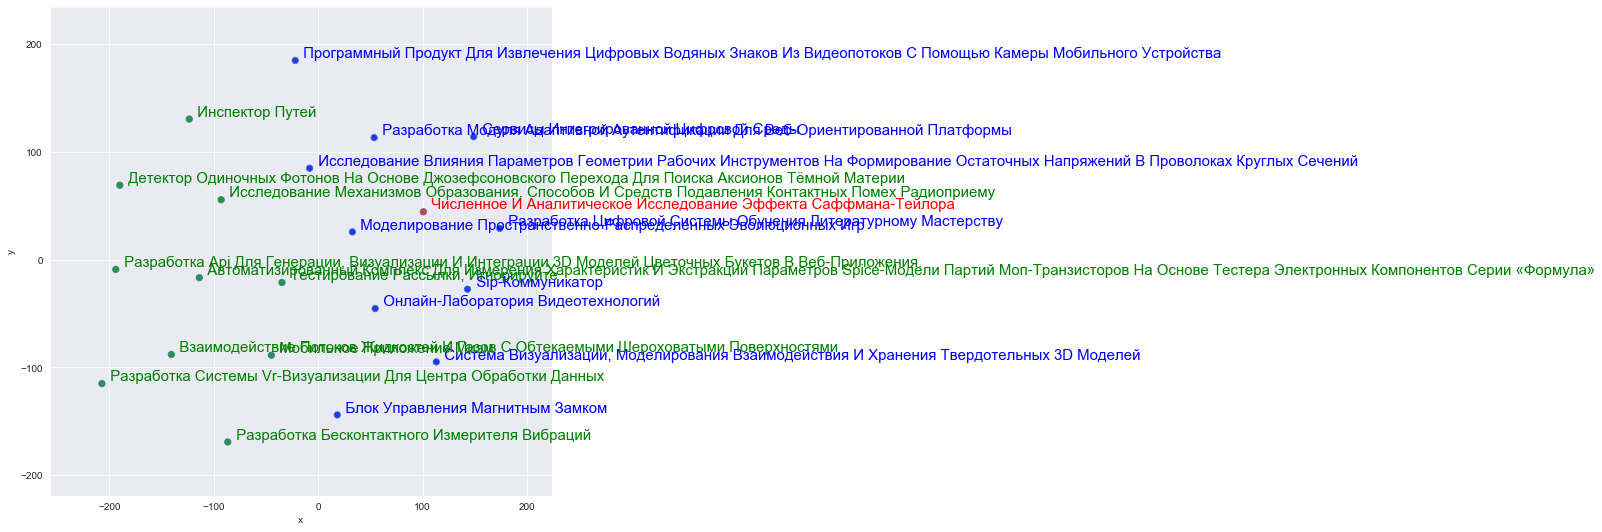

In [126]:
tsnescatterplot(model, 'Численное и аналитическое исследование эффекта Саффмана-Тейлора', [i[0] for i in model.wv.most_similar(negative=["Численное и аналитическое исследование эффекта Саффмана-Тейлора"])])